### Simple Exploratory

In [84]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

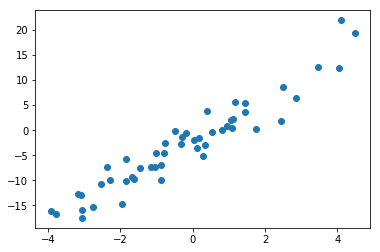

In [85]:
# Make some data
n = 50
x = 2*np.random.randn(n)
y = 4*x-2+3*np.random.randn(n)

# Plot
plt.scatter(x,y)
plt.show;

In [86]:
# Make some data
# np.stack([A, B]) is used to vertically add B on A
X = np.stack([np.ones(n), x]).T

# Compute betas without gradient descent using the formula
# np.linalg.inv(A) is used to compute the inverse A
# y[:, np.newaxis] is used to convert the shape from (50, ) to (50, 1)
np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y[:, np.newaxis])

array([[-2.02472365],
       [ 4.0298796 ]])

### Compute betas with gradient descent

In [91]:
# Define loss function 
def loss(y, yhat):
    return np.mean((y-yhat)**2)

# Define model
def yhat(x, coeffs):
    beta_0, beta_1 = coeffs
    return beta_0+beta_1*x

# Define gradient function
def grad_f(betas, x, y):
    beta_0, beta_1 = betas
    y_hat = yhat(x, betas)
    errors = (y-y_hat)
    
    dLdbeta0 = -2*np.mean(errors)
    dLdbeta1 = -2*np.mean(errors*x)
    
    return np.array([dLdbeta0, dLdbeta1])

In [92]:
# Compute optimal betas using gradient descent
def grad_descent(x, y, start_point, iters, lr):
    
    betas = start_point
    trajectory = [betas]
    losses = [loss(y, yhat(x, betas))]
    
    for i in range(iters):
        grad = grad_f(betas, x, y)
        betas = betas -lr*grad
        trajectory.append(betas)
        losses.append(loss(y, yhat(x, betas)))
        
    return np.array(trajectory), losses

In [93]:
betas, losses = grad_descent(x, y, np.array([0.0, 0.0]), 50, 0.01)

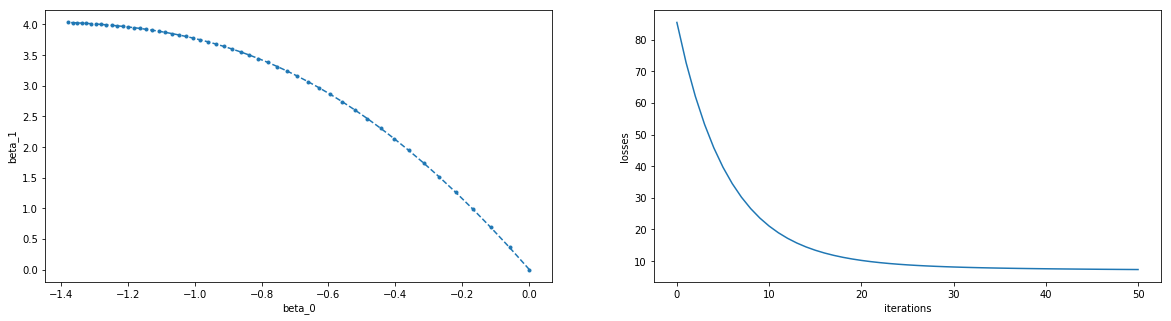

In [100]:
# Plot the betas and losses
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
plt.plot(betas[:, 0], betas[:, 1], '.--')
plt.xlabel('beta_0')
plt.ylabel('beta_1')

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('losses')
plt.show()

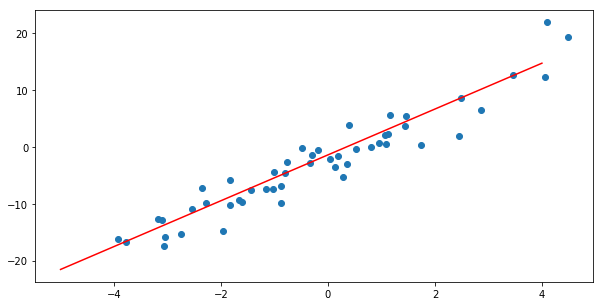

In [104]:
# Plot the scatter plot with the regression model
plt.figure(figsize = (10, 5))
plt.scatter(x, y)
x_ = np.linspace(-5, 4, 100)
y_ = yhat(x_, betas[-1])
plt.plot(x_, y_, 'r')
plt.show()